# TWAS
Manhattan plot of TWAS results for AD_Bellenguez_2022 GWAS;
### Aim
This notebook aims to get the TWAS genes for AD GWAS and see if these genes related with gait speed identified in `/mnt/lustre/home/rl3328/rl3328/motor_QTL_project/Data_analysis/TWAS/EDA/plots_preparation.ipynb` are associated with ADRD risk.


### Input
Input files are all on the new AWS-based HPC
* Combined TWAS file for AD_Bellenguez_2022 GWAS:`/mnt/lustre/home/rl3328/rl3328/rosmap_eqtl_pqtl_results_merged_updated.tsv`
* reference file for gene annotation: `/mnt/lustre/home/rl3328/rl3328/resource/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.region_list.2025`


#### TWAS

In [1]:
library(data.table)
library(tidyverse)
twas <- fread('/mnt/lustre/home/rl3328/rl3328/rosmap_eqtl_pqtl_results_merged_updated.tsv')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   3.5.2     ✔ tibble    3.3.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purrr::transpose()   masks data.table::transpose()
✖ lubridate::wday() 

In [2]:
head(twas)
dim(twas)

chr,molecular_id,TSS,start,end,context,gwas_study,method,is_imputable,is_selected_method,rsq_cv,pval_cv,twas_z,twas_pval,type,block,context_simp,gene_context,re_selected_method
<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>
10,ENSG00000065613,103967139,102967139,105029233,AC_DeJager_eQTL,Bellenguez_EADI_2022,bayes_l,TRUE,TRUE,0.08221447,1.098225e-12,-0.72943406,0.4657362,eQTL,chr10_100331627_104378781,AC_DeJager_eQTL,ENSG00000065613_AC_DeJager_eQTL,TRUE
10,ENSG00000065613,103967139,102967139,105029233,AC_DeJager_eQTL,Bellenguez_EADB_2022,bayes_l,TRUE,TRUE,0.08221447,1.098225e-12,-0.43845687,0.6610551,eQTL,chr10_100331627_104378781,AC_DeJager_eQTL,ENSG00000065613_AC_DeJager_eQTL,TRUE
10,ENSG00000065613,103967139,102967139,105029233,AC_DeJager_eQTL,Bellenguez_GRACE_2022,bayes_l,TRUE,TRUE,0.08221447,1.098225e-12,0.05508087,0.9560740,eQTL,chr10_100331627_104378781,AC_DeJager_eQTL,ENSG00000065613_AC_DeJager_eQTL,TRUE
10,ENSG00000065613,103967139,102967139,105029233,AC_DeJager_eQTL,Wightman_ExcludingUKBand23andME_2021,bayes_l,TRUE,TRUE,0.08221447,1.098225e-12,0.65274568,0.5139203,eQTL,chr10_100331627_104378781,AC_DeJager_eQTL,ENSG00000065613_AC_DeJager_eQTL,TRUE
10,ENSG00000065613,103967139,102967139,105029233,AC_DeJager_eQTL,Bellenguez_2022,bayes_l,TRUE,TRUE,0.08221447,1.098225e-12,0.51371413,0.6074519,eQTL,chr10_100331627_104378781,AC_DeJager_eQTL,ENSG00000065613_AC_DeJager_eQTL,TRUE
10,ENSG00000065613,103967139,102967139,105029233,AC_DeJager_eQTL,Jansen_2021,bayes_l,TRUE,TRUE,0.08221447,1.098225e-12,-0.05617106,0.9552055,eQTL,chr10_100331627_104378781,AC_DeJager_eQTL,ENSG00000065613_AC_DeJager_eQTL,TRUE


[1] 5051102      19

In [3]:
## TWAS analysis were performed across 10 contexts and 13872 genes
twas %>% pull(context) |> unique()%>%length

twas %>% pull(molecular_id)%>%unique()%>%length



[1] 3964

[1] 15619

In [5]:
## 13872 total genes, 10778 are from DLPFC
# twas |> group_by(context) |> summarize(gene = n_distinct(molecular_id))

In [6]:
DLPFC_bulk_twas = twas |> filter(context == "DLPFC_DeJager_eQTL")

In [7]:
DLPFC_bulk_twas |> pull(molecular_id) |> unique() |> length()

[1] 10065

In [8]:

DLPFC_bulk_twas_sig <- DLPFC_bulk_twas %>% filter(is_selected_method=="TRUE")%>%filter(twas_pval<=0.05)#%>%pull(context)%>%unique()
DLPFC_bulk_twas_sig|> pull(molecular_id)%>%unique()%>%length


[1] 3856

In [17]:

## All models significant after bonferroni correction
# DLPFC_bulk_twas |> filter(twas_pval < unadj_cutoff, str_detect(context, "DLPFC"))



### summarize significant TWAS genes

* Significant TWAS associations were defined using two criteria: (i) the most accurate prediction model yielded a TWAS p-value below the Bonferroni-corrected threshold, or (ii) at least half of the prediction models produced p-values below this threshold.


In [9]:
n_imputable_genes <- DLPFC_bulk_twas %>%
  filter(is_imputable) %>%                  # keep only imputable rows
  distinct(molecular_id, context, gwas_study) %>%         # count unique gene-context pairs
  nrow()
n_imputable_genes

[1] 87908

In [10]:
# Compute cutoff using Bonferroni-style correction
unadj_cutoff <- 0.05 / n_imputable_genes
unadj_cutoff

[1] 5.687764e-07

In [11]:
twas_unadj_sig <- DLPFC_bulk_twas %>%
  mutate(sig = twas_pval < unadj_cutoff) %>%
  group_by(molecular_id, context, gwas_study) %>%
  summarise(
    n_methods = n(),
    n_sig = sum(sig, na.rm = T),
    best_sig = any(sig & is_selected_method, na.rm = T),
    .groups = "drop"
  ) %>%
  mutate(pass = (n_sig / n_methods >= 0.5) | best_sig) %>%
  mutate(pass_strict = (n_sig / n_methods >= 0.5)) %>%
  filter(pass) %>% left_join(twas) %>% arrange(twas_pval) %>% distinct(molecular_id, .keep_all = T)
twas_unadj_sig %>% dim

Joining with `by = join_by(molecular_id, context, gwas_study)`


[1] 78 24

In [12]:
gene_ref <- fread('/mnt/lustre/home/rl3328/rl3328/resource/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.region_list.2025')

## Figure data

In [13]:
df <- DLPFC_bulk_twas %>%
  mutate(sig = twas_pval < unadj_cutoff) %>%
  group_by(molecular_id, context, gwas_study) %>%
  summarise(
    n_methods = n(),
    n_sig = sum(sig, na.rm = TRUE),
    best_pval = min(twas_pval, na.rm = TRUE),
    best_method_pval = min(twas_pval[is_selected_method], na.rm = TRUE),
    best_method_selected = any(sig & is_selected_method, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    pass = (n_sig / n_methods >= 0.5) | best_method_selected, # pass defined by two threshold, best or half methods satisfied
    final_pval = ifelse(n_sig / n_methods >= 0.5, best_pval, best_method_pval),
    # fallback: if no selected method existed (Inf), use best_pval
    final_pval = ifelse(is.infinite(final_pval), best_pval, final_pval)
  ) %>%
  left_join(twas, by = c("molecular_id", "context", "gwas_study")) %>%
  filter(twas_pval == final_pval) %>%
  distinct(molecular_id, .keep_all = TRUE) %>%
  mutate(
    logp = -log10(twas_pval) * sign(twas_z),
    pos = (start + end) / 2
  ) %>%
  merge(gene_ref, by.x = 'molecular_id', by.y = 'gene_id')

# Order chromosomes
df$chr <- factor(df$chr, levels = as.character(1:22))

Warning message:
“There were 576 warnings in `summarise()`.
The first warning was:
ℹ In argument: `best_pval = min(twas_pval, na.rm = TRUE)`.
ℹ In group 345: `molecular_id = "ENSG00000004777"`, `context =
  "DLPFC_DeJager_eQTL"`, `gwas_study = "Wightman_Excluding23andMe_2021"`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 575 remaining warnings.”


In [15]:
dim(df)

[1] 10065    32

In [16]:
head(df)

,molecular_id,context,gwas_study,n_methods,n_sig,best_pval,best_method_pval,best_method_selected,pass,final_pval,⋯,block,context_simp,gene_context,re_selected_method,logp,pos,#chr,TSS.y,TES,gene_name
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,⋯,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>
1,ENSG00000000419,DLPFC_DeJager_eQTL,Bellenguez_2022,8,0,1.641252e-01,2.542136e-01,FALSE,FALSE,2.542136e-01,⋯,chr20_50319421_53436693,DLPFC_DeJager_eQTL,ENSG00000000419_DLPFC_DeJager_eQTL,TRUE,0.5948012,51747434,chr20,50958555,50934867,DPM1
2,ENSG00000000457,DLPFC_DeJager_eQTL,Bellenguez_2022,8,0,3.295114e-01,4.853580e-01,FALSE,FALSE,4.853580e-01,⋯,chr1_168438717_170228106,DLPFC_DeJager_eQTL,ENSG00000000457_DLPFC_DeJager_eQTL,TRUE,-0.3139378,169540000,chr1,169894267,169849631,SCYL3
3,ENSG00000000460,DLPFC_DeJager_eQTL,Bellenguez_2022,8,0,5.139800e-01,5.601418e-01,FALSE,FALSE,5.601418e-01,⋯,chr1_168438717_170228106,DLPFC_DeJager_eQTL,ENSG00000000460_DLPFC_DeJager_eQTL,TRUE,-0.2517020,169540000,chr1,169662007,169854080,C1orf112
4,ENSG00000000971,DLPFC_DeJager_eQTL,Bellenguez_2022,8,0,1.056513e-01,1.436662e-01,FALSE,FALSE,1.436662e-01,⋯,chr1_195599253_199271134,DLPFC_DeJager_eQTL,ENSG00000000971_DLPFC_DeJager_eQTL,TRUE,-0.8426455,195093752,chr1,196652043,196747504,CFH
5,ENSG00000001084,DLPFC_DeJager_eQTL,Bellenguez_2022,8,0,4.759202e-01,4.759202e-01,FALSE,FALSE,4.759202e-01,⋯,chr6_52730905_54027603,DLPFC_DeJager_eQTL,ENSG00000001084_DLPFC_DeJager_eQTL,TRUE,-0.3224659,53557156,chr6,53616970,53497341,GCLC
6,ENSG00000001167,DLPFC_DeJager_eQTL,Bellenguez_2022,8,0,9.274035e-06,9.274035e-06,FALSE,FALSE,9.274035e-06,⋯,chr6_40377803_42070711,DLPFC_DeJager_eQTL,ENSG00000001167_DLPFC_DeJager_eQTL,TRUE,5.0327312,40409988,chr6,41072945,41099976,NFYA


In [17]:
chr_info <- df %>%
  group_by(chr) %>%
  summarise(chr_len = max(pos)) %>%
  mutate(chr_start = lag(cumsum(chr_len), default = 0))

df <- df %>%
  left_join(chr_info, by = "chr") %>%
  mutate(cum_pos = pos + chr_start)
  
axis_df <- chr_info %>%
  mutate(center = chr_start + chr_len/2)


In [18]:

# Add a column for MR significance (example: FDR < 0.05)
df <- df %>%
  mutate(category = case_when(
    pass ~ "TWAS",        # TWAS significant
    !pass ~ "Not Significant",  # Neither significant
    TRUE ~ "Others"                              # Catch-all for remaining cases
  ))

In [19]:
# dir.create('data')
saveRDS(list(df = df, unadj_cutoff = unadj_cutoff, axis_df= axis_df), 'data/AD_TWAS_manhattan_plot_data.rds')

## AD TWAS manhattan plots

In [1]:
library(ggplot2)
library(ggrepel)
library(dplyr)

# Add a column for MR significance (example: FDR < 0.05)
df <- readRDS('data//AD_TWAS_manhattan_plot_data.rds')$df
unadj_cutoff <- readRDS('data//AD_TWAS_manhattan_plot_data.rds')$unadj_cutoff
axis_df <- readRDS('data//AD_TWAS_manhattan_plot_data.rds')$axis_df
DLPFC_bulk = df |> filter(context == "DLPFC_DeJager_eQTL")

p <- ggplot(DLPFC_bulk, aes(x = cum_pos, y = logp)) +
  geom_point(aes(color = category), size = 2, alpha = 0.8) +
  scale_color_manual(
    values = c(
      "TWAS" = "steelblue",
      "Not Significant" = "grey80"
    )
  ) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  geom_hline(
    yintercept = c(-log10(unadj_cutoff), log10(unadj_cutoff)), 
    linetype = "dashed", color = "red"
  ) +
  geom_text_repel(
    data = DLPFC_bulk %>% filter(category != "Not Significant" & abs(logp) > 2),
    aes(label = gene_name),
    size = 3,
    color = "steelblue",
    box.padding = 0.3,
    max.overlaps = 50
  ) +
  scale_x_continuous(
    breaks = axis_df$center,
    labels = axis_df$chr
  ) +
  labs(
    x = "Chromosome",
    y = expression(-log[10](P)),
    title = "Manhattan Plot of TWAS for AD_Bellenguez_2022 in DLPFC bulk RNA-seq"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "bottom"
  )


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




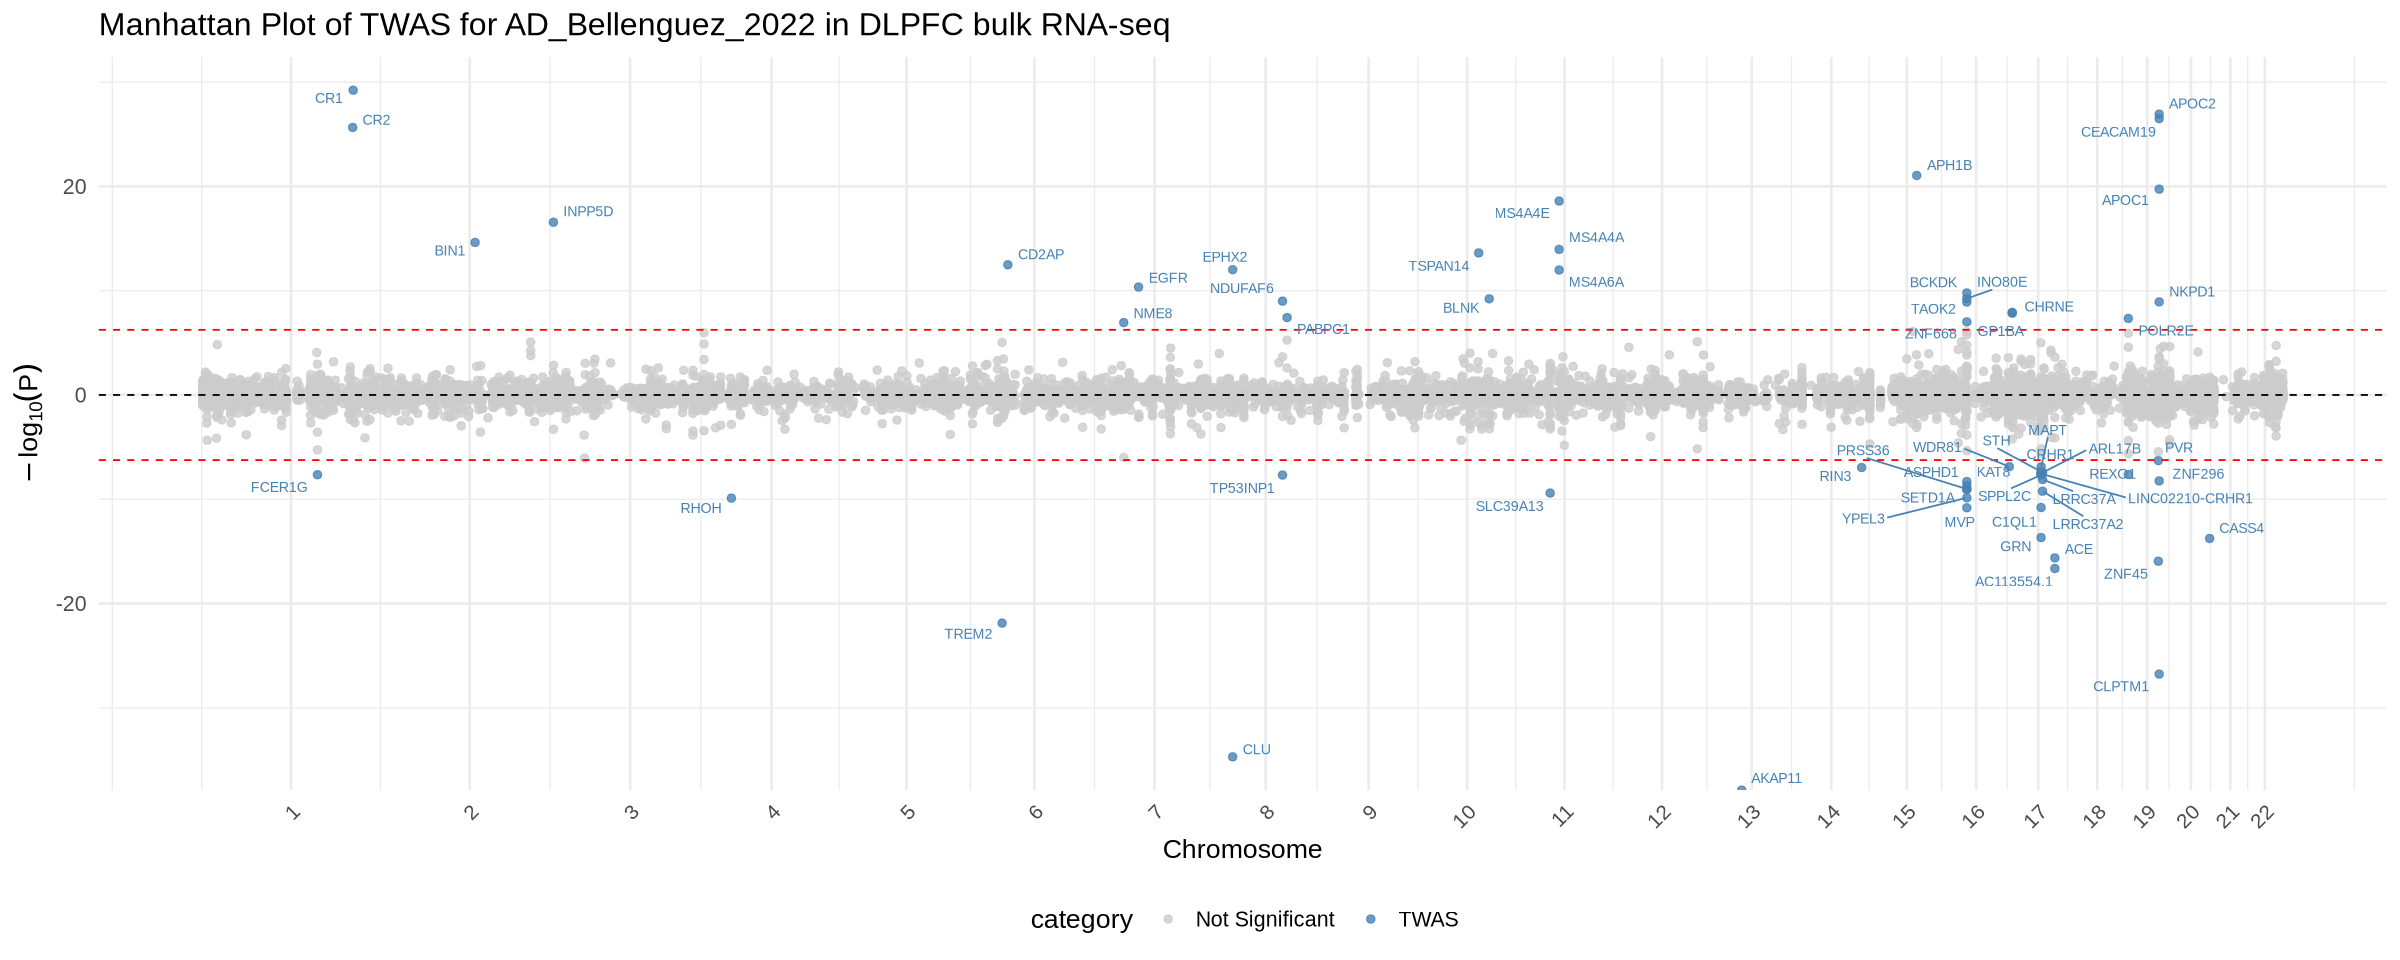

In [22]:
options(repr.plot.width = 20, repr.plot.height = 8)
p

In [23]:
ggsave("DLPFC_AD_Bellenguez_TWAS_manhattan_plot.pdf", p, width = 18, height = 10, dpi = 300)


## Overlap between AD TWAS gene and gait speed TWAS gene

In [2]:
# Add a column for MR significance (example: FDR < 0.05)
wp_df <- readRDS('data//TWAS_manhattan_plot_data.rds')$df
wp_unadj_cutoff <- readRDS('data//TWAS_manhattan_plot_data.rds')$unadj_cutoff

In [3]:
head(wp_df)

,molecular_id,context,gwas_study.x,n_methods,n_sig,best_pval,best_method_pval,best_method_selected,pass,final_pval,⋯,gwas_study.y,meta_eff,meta_pval,num_CS,num_IV,se_meta_eff,region.y,study_context.y,source_file.y,category
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,ENSG00000000457,DLPFC_DeJager_eQTL,unadjusted_wp_2020,6,0,0.506484945,0.506484945,FALSE,FALSE,0.506484945,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Not Significant
2,ENSG00000000460,DLPFC_DeJager_eQTL,unadjusted_wp_2020,6,0,0.400370493,0.633623327,FALSE,FALSE,0.633623327,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Not Significant
3,ENSG00000000971,DLPFC_DeJager_eQTL,unadjusted_wp_2020,6,0,0.006181974,0.007051131,FALSE,FALSE,0.007051131,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Not Significant
4,ENSG00000001084,DLPFC_DeJager_eQTL,unadjusted_wp_2020,6,0,0.147556313,0.502194806,FALSE,FALSE,0.502194806,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Not Significant
5,ENSG00000001460,DLPFC_DeJager_eQTL,unadjusted_wp_2020,6,0,0.659517185,0.659517185,FALSE,FALSE,0.659517185,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Not Significant
6,ENSG00000001461,DLPFC_DeJager_eQTL,unadjusted_wp_2020,6,0,0.414763094,0.778955410,FALSE,FALSE,0.778955410,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Not Significant


In [11]:
wp_twas_gene = wp_df |> filter(pass) |> pull(molecular_id)
ad_twas_gene = df |> filter(pass) |> pull(molecular_id)
wp_twas_mr_gene = wp_df |> filter(pass, !is.na(Q_pval)) |> pull(molecular_id)

In [14]:
## KAT8, SLC39A13 and ZNF668 are significant TWAS gene for both gait speed and AD
intersect_genes <- intersect(wp_twas_gene, ad_twas_gene)
intersect_genes

[1] "ENSG00000103510" "ENSG00000165915" "ENSG00000167394"

In [ ]:
## ZNF668 is the only gene with MR significance among the three overlap genes
intersect(wp_twas_mr_gene, ad_twas_gene)

[1] "ENSG00000167394"